In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_6_descriptive = get_prompt("descriptive", 6)
prompt_6_natural = get_prompt("natural", 6)

prompt_6_descriptive, prompt_6_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_6_descriptive)

Thought: To complete the tasks, I will need to perform the following steps sequentially:

1. Download the PDB file for 1LYZ.
2. Compute the secondary structure assignments for the downloaded PDB structure.
3. Set up and run a simulation for 1 picosecond at 300 K.
4. Compute the RMSD of the simulation.
5. Compute the radius of gyration over time.
6. Compute the solvent accessible surface area (SASA).

I will start by downloading the PDB file for 1LYZ.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To proceed with the tasks, I will now compute the secondary structure assignments for the downloaded PDB structure (1LYZ).

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_023256",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will now set up and run a simulation for 1 picosecond at 300 K using the downloaded PDB file (1LYZ).

Action:
```json
{
  "ac

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023256: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023256
 rec0_023258: dssp values for trajectory with id: 1LYZ_023256
 1LYZ_023306: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023310: Initial positions for simulation sim0_023310
 sim0_023310: Basic Simulation of Protein 1LYZ_023306
 rec0_023311: Simulation trajectory for protein 1LYZ_023306 and simulation sim0_023310
 rec1_023311: Simulation state log for protein 1LYZ_023306 and simulation sim0_023310
 rec2_023311: Simulation pdb frames for protein 1LYZ_023306 and simulation sim0_023310
 rmsd_023310: RMSD for 023310
 fig0_023315: RMSD plot for 023310
 rgy_rec0_023311: Radii of gyration per frame for rec0_023311
 fig0_023317: Plot of radii of gyration over time for rec0_023311
 sasa_sim0_023310: Total SASA values for sim0_023310
 fig0_023320: Plot of SASA over time fo

In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_023256"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_023256", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [10]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_023311")
top_path_1 = registry_1.get_mapped_path("top_sim0_023310")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

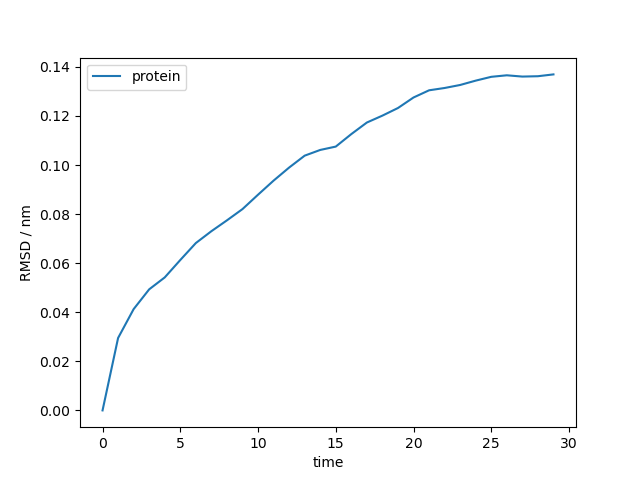

In [11]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023315'))

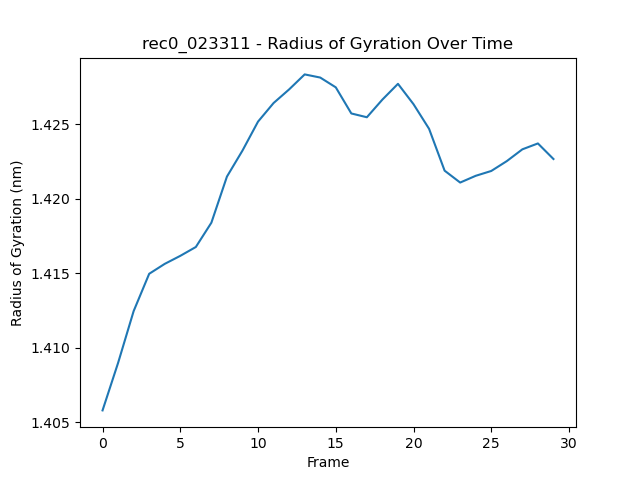

In [12]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023317'))

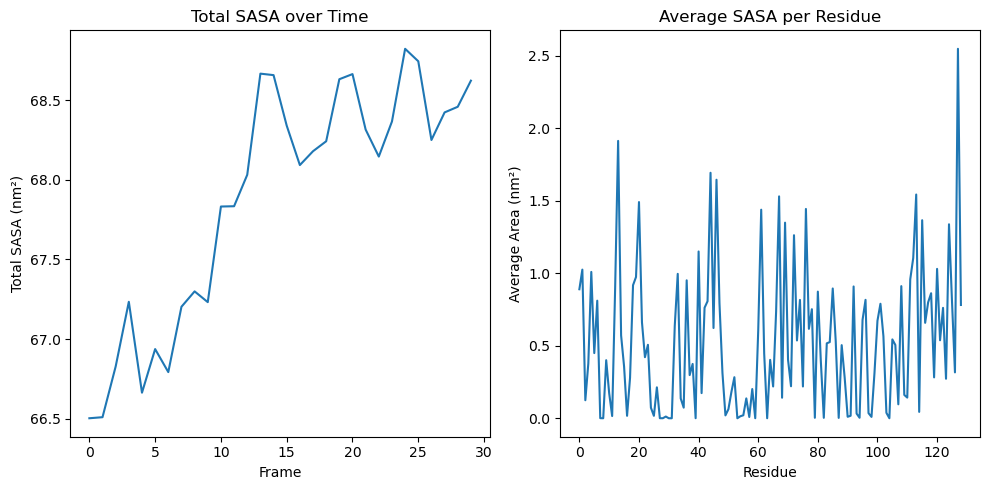

In [13]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023320'))

In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_6_natural)

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 1LYZ.
2. Set up and run a molecular dynamics simulation for 1 picosecond at 300 K.
3. Compute the secondary structure assignments of the downloaded PDB structure.
4. Compute the RMSD, SASA, and radius of gyration from the simulation.

I will start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To proceed, I need to set up and run a molecular dynamics simulation for 1 picosecond at 300 K using the downloaded PDB file (1LYZ_023447). After that, I will compute the secondary structure assignments, RMSD, SASA, and radius of gyration.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023447",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [16]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023447: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023447
 1LYZ_023459: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023504: Initial positions for simulation sim0_023504
 sim0_023504: Basic Simulation of Protein 1LYZ_023459
 rec0_023504: Simulation trajectory for protein 1LYZ_023459 and simulation sim0_023504
 rec1_023504: Simulation state log for protein 1LYZ_023459 and simulation sim0_023504
 rec2_023504: Simulation pdb frames for protein 1LYZ_023459 and simulation sim0_023504
 rec0_023511: dssp values for trajectory with id: rec0_023504
 rmsd_023504: RMSD for 023504
 fig0_023514: RMSD plot for 023504
 sasa_sim0_023504: Total SASA values for sim0_023504
 fig0_023518: Plot of SASA over time for sim0_023504
 rgy_rec0_023504: Radii of gyration per frame for rec0_023504
 fig0_023520: Plot of radii of gyration over time fo

In [17]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_023447")) 

In [25]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_023447", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [24]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_023504")
top_path_2 = registry_2.get_mapped_path("top_sim0_023504")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

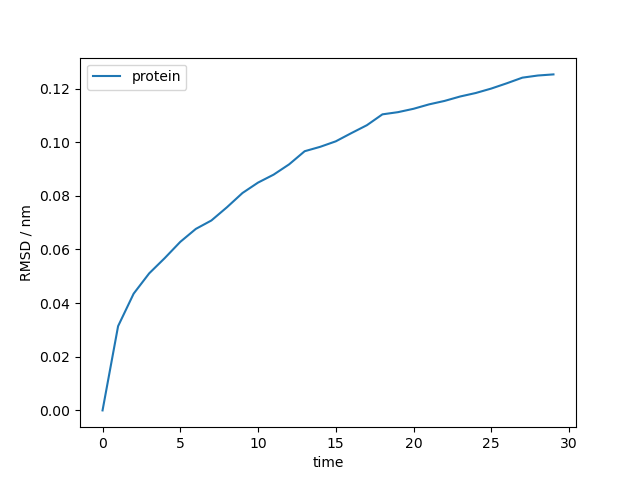

In [23]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023514'))

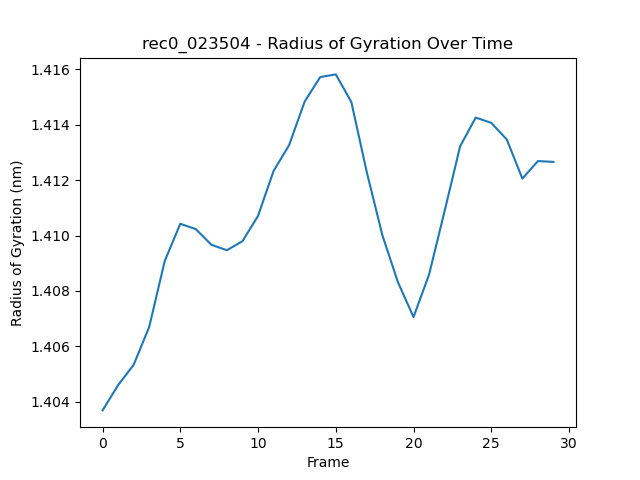

In [22]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023520'))

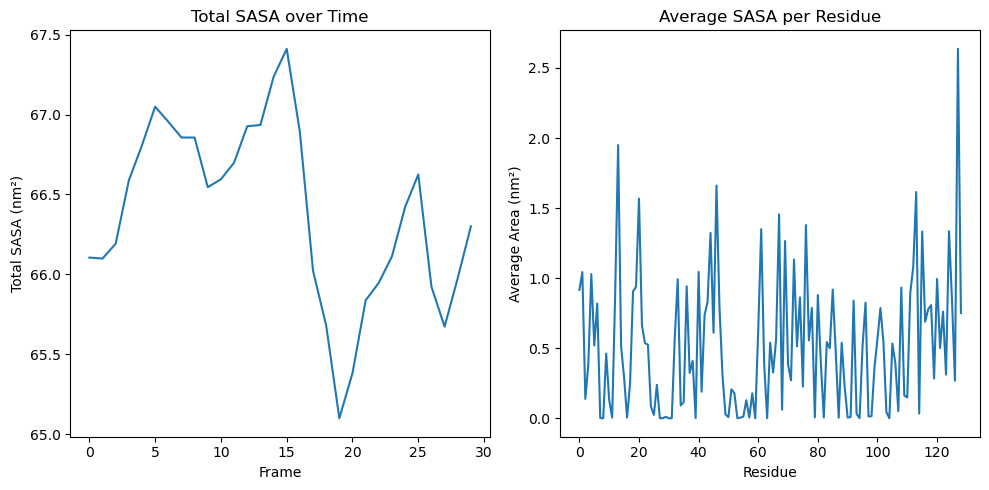

In [21]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023518'))